# Charts
We'll use pandas, matplotlib, and seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
players = pd.read_csv('core/People.csv')
players = players[['playerID', 'nameFirst', 'nameLast']]
batting = pd.read_csv('core/Batting.csv')
batting = batting[['playerID', 'AB', 'H', 'HR', 'yearID']]
playerHits = pd.merge(players, batting, on='playerID')
playerHits.head()

,playerID,nameFirst,nameLast,AB,H,HR,yearID
0,aardsda01,David,Aardsma,0,0,0,2004
1,aardsda01,David,Aardsma,2,0,0,2006
2,aardsda01,David,Aardsma,0,0,0,2007
3,aardsda01,David,Aardsma,1,0,0,2008
4,aardsda01,David,Aardsma,0,0,0,2009


## Check for nan

In [4]:
playerHits[playerHits.isna().any(axis=1)]
playerHits = playerHits.dropna()
playerHits.yearID = playerHits.yearID.astype('int')
playerHits.head()

,playerID,nameFirst,nameLast,AB,H,HR,yearID
0,aardsda01,David,Aardsma,0,0,0,2004
1,aardsda01,David,Aardsma,2,0,0,2006
2,aardsda01,David,Aardsma,0,0,0,2007
3,aardsda01,David,Aardsma,1,0,0,2008
4,aardsda01,David,Aardsma,0,0,0,2009


## Display a scatterplot of year vs. hits

<AxesSubplot:xlabel='yearID', ylabel='H'>

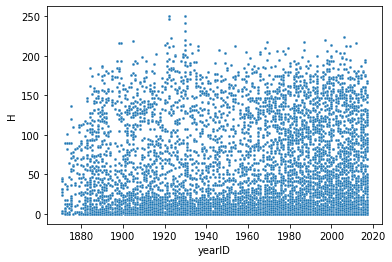

In [5]:
sns.scatterplot(x='yearID', y='H', data=playerHits.sample(frac=0.1), s=8)

## Do a lineplot

/Users/edwards/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearID', ylabel='H'>

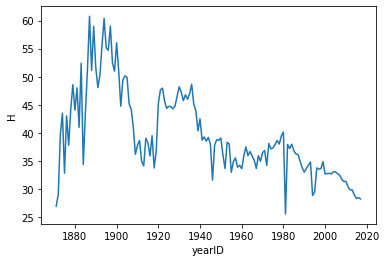

In [6]:
batting = playerHits.groupby('yearID').agg({'H':'mean', 'AB':'mean'}).reset_index()
sns.lineplot('yearID', 'H', data=batting)

/Users/edwards/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 0.33)

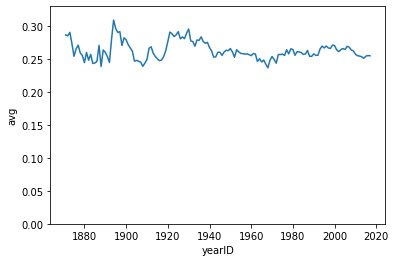

In [7]:
import matplotlib.pyplot as plt
batting['avg'] = batting.H / batting.AB
batting
sns.lineplot('yearID', 'avg', data=batting)
plt.ylim([0, .33])

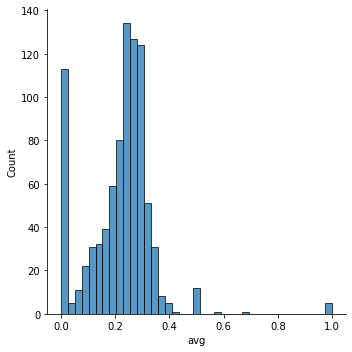

In [20]:
playerHits
playerHits.yearID.astype('int')
playerHits1996 = playerHits[playerHits.yearID == 1996]
playerHits1996.yearID.unique()
# sns.displot(data=playerHits1996, x='H')

# playerHits1996batters = playerHits1996[playerHits1996.AB >= 10]
# sns.displot(data=playerHits1996batters, x='H')

df = playerHits1996.copy()
df['avg'] = df.H / df.AB
df = df[df.AB >= 1]
sns.displot(data=df, x='avg')


## Look at players who have at least 250 hits in any year

In [28]:
df = playerHits.copy()
playerIDs = df[df.H >= 250].playerID
playerIDs
df = df[df.playerID.isin(playerIDs)]
df

,playerID,nameFirst,nameLast,AB,H,HR,yearID
43344,hornsro01,Rogers,Hornsby,57,14,0,1915
43345,hornsro01,Rogers,Hornsby,495,155,6,1916
43346,hornsro01,Rogers,Hornsby,523,171,8,1917
43347,hornsro01,Rogers,Hornsby,416,117,5,1918
43348,hornsro01,Rogers,Hornsby,512,163,8,1919
...,...,...,...,...,...,...,...
93093,terrybi01,Bill,Terry,643,225,28,1932
93094,terrybi01,Bill,Terry,475,153,6,1933
93095,terrybi01,Bill,Terry,602,213,8,1934
93096,terrybi01,Bill,Terry,596,203,6,1935


<AxesSubplot:xlabel='yearID', ylabel='H'>

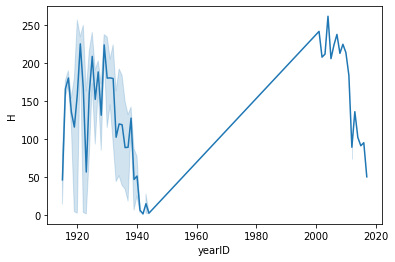

In [30]:
df
sns.lineplot(data=df, x='yearID', y='H')

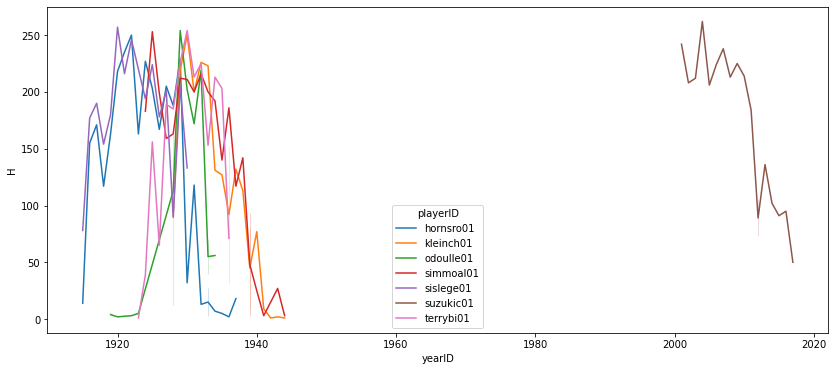

In [50]:
plt.figure(figsize=(14,6))
# for playerID in playerIDs:
#     data = playerHits[playerHits.playerID == playerID]
#     firstRow = data.iloc[0]
#     name = '{}, {}'.format(firstRow.nameLast, firstRow.nameFirst)
#     sns.lineplot(data=data, x='yearID', y='H', label=name)
sns.lineplot(data=df, x='yearID', y='H', hue='playerID')
    
plt.savefig('club250.png')

## Show a bar chart of club 250's hits

<AxesSubplot:xlabel='nameLast', ylabel='avg'>

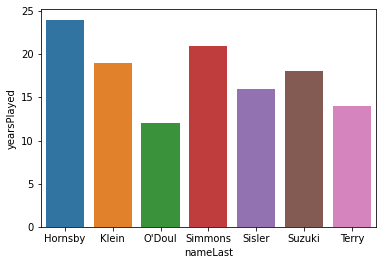

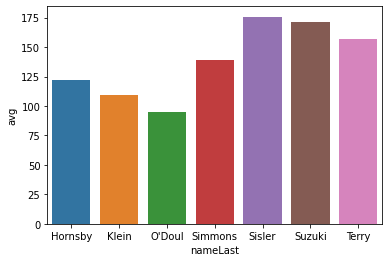

In [47]:
club250 = playerHits[playerHits.playerID.isin(playerIDs)]
club250.head()
club250 = club250.groupby('playerID').agg({'H':['sum','count'], 'nameLast':'first'}).reset_index()
club250.columns=['playerID','totalHits', 'yearsPlayed', 'nameLast']
club250

# sns.barplot(data=club250, x='nameLast', y='H')

sns.barplot(data=club250, x='nameLast', y='yearsPlayed')
club250['avg'] = club250.totalHits / club250.yearsPlayed

plt.figure()
sns.barplot(data=club250, x='nameLast', y='avg')
